# Aufgabe 36: Entfaltung mit quadratischen Matrizen
### a) Aufstellen der Migrationsmatrix

Die Matrix $A$ beschreibt beispielsweise einen direkten Messprozess mit begrenzter Auflösung, sodass ein Ereignis aus einem Bin mit der Wahrscheinlichkeit $\epsilon$ in den Nachbarbin verschoben wird.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_matrix(dimension, epsilon):
    matrix = np.matrix(np.zeros((dimension, dimension)))
    matrix += np.diag((1-2*epsilon)*np.ones(dimension))
    matrix += np.diag(epsilon*np.ones(dimension-1), k=-1)
    matrix += np.diag(epsilon*np.ones(dimension-1), k=1)
    matrix[(0,0)] = 1 - epsilon
    matrix[(dimension-1, dimension-1)] = 1 - epsilon
    return matrix 

In [3]:
epsilon = .23
make_matrix(5, epsilon)

matrix([[0.77, 0.23, 0.  , 0.  , 0.  ],
        [0.23, 0.54, 0.23, 0.  , 0.  ],
        [0.  , 0.23, 0.54, 0.23, 0.  ],
        [0.  , 0.  , 0.23, 0.54, 0.23],
        [0.  , 0.  , 0.  , 0.23, 0.77]])

### b) Erzeugen einer gemessenen Verteilung

Wahre Verteilung $\vec{f}$:

In [4]:
f = np.matrix((193,485,664,763,804,805,779,736,684,626,566,508,452,400,351,308,268,233,202,173)).reshape(-1,1)
f

matrix([[193],
        [485],
        [664],
        [763],
        [804],
        [805],
        [779],
        [736],
        [684],
        [626],
        [566],
        [508],
        [452],
        [400],
        [351],
        [308],
        [268],
        [233],
        [202],
        [173]])

In [5]:
A = make_matrix(20,epsilon)
g = A*f
g

matrix([[260.16],
        [459.01],
        [645.6 ],
        [749.66],
        [794.8 ],
        [798.79],
        [775.09],
        [733.93],
        [682.62],
        [625.54],
        [566.46],
        [508.46],
        [452.92],
        [400.69],
        [352.38],
        [308.69],
        [269.15],
        [233.92],
        [202.46],
        [179.67]])

In [6]:
g_values = np.array(g).reshape(-1)

np.random.seed(0)
g_mess = np.random.poisson(lam=g_values, size=(1, 20))
g_mess = np.matrix(g_mess.reshape(-1,1))
g_mess

matrix([[262],
        [465],
        [640],
        [745],
        [873],
        [825],
        [780],
        [684],
        [705],
        [623],
        [534],
        [510],
        [438],
        [398],
        [358],
        [346],
        [262],
        [243],
        [209],
        [167]])

### c) Transformation der Faltungsgleichung in die Eigenbasis
Die Migrationsmatrix ergibt sich aus ihrer Darstellung in Eigenbasis $D$ durch die Transformation $$ A = U D U^{-1}. $$
Dabei ist $D = \text{diag}(\vec{\lambda})$ und die Spalten von U sind die zugehörigen Eigenvektoren. 
Die Faltungsgleichung lautet $ g = Af$.  
Es gilt somit $$ U^{-1}g =: c = DU^{-1}f =: Db. $$ 
Eine Rechnung in der Eigenbasis liefert den Vorteil, dass man die Anteile mit kleinen Eigenwerten entfernen kann. Diese tragen keine Information und führen wegen der schlechten Konditionierung zu Oszillationen bzw. Rauschen.

In [24]:
lambdaschs, ev = np.linalg.eig(A) # Spalten von ev sind die Eigenvektoren
lambdaschs
#ev

array([0.08566336, 0.102514  , 0.130137  , 0.16785218, 0.21473088,
       0.26961878, 0.33116437, 0.39785218, 0.46804015, 0.54      ,
       0.61195985, 0.68214782, 0.74883563, 0.81038122, 0.86526912,
       1.        , 0.99433664, 0.977486  , 0.949863  , 0.91214782])

In [8]:
indices_sort = np.argsort(lambdaschs)[::-1] #Indizes der größten Eigenwerte zuerst
lambdaschs_sorted = np.sort(lambdaschs)[::-1]
lambdaschs_sorted

array([1.        , 0.99433664, 0.977486  , 0.949863  , 0.91214782,
       0.86526912, 0.81038122, 0.74883563, 0.68214782, 0.61195985,
       0.54      , 0.46804015, 0.39785218, 0.33116437, 0.26961878,
       0.21473088, 0.16785218, 0.130137  , 0.102514  , 0.08566336])

In [9]:
U = np.matrix( np.zeros((20,20)) )
j = 0
for i in indices_sort:
    U[:,j] = ev[:,i].reshape(-1,1)
    j += 1
U

matrix([[-2.23606798e-01, -3.15252941e-01,  3.12334477e-01,
          3.07490368e-01,  3.00750478e-01,  2.92156361e-01,
          2.81761003e-01,  2.69628494e-01, -2.55833637e-01,
          2.40461480e-01, -2.23606798e-01,  2.05373505e-01,
          1.85874017e-01,  1.65228554e-01,  1.43564402e-01,
         -1.21015127e-01, -9.77197538e-02, -7.38219059e-02,
          4.94689214e-02,  2.48109446e-02],
        [-2.23606798e-01, -3.07490368e-01,  2.81761003e-01,
          2.40461480e-01,  1.85874017e-01,  1.21015127e-01,
          4.94689214e-02, -2.48109446e-02,  9.77197538e-02,
         -1.65228554e-01,  2.23606798e-01, -2.69628494e-01,
         -3.00750478e-01, -3.15252941e-01, -3.12334477e-01,
          2.92156361e-01,  2.55833637e-01,  2.05373505e-01,
         -1.43564402e-01, -7.38219059e-02],
        [-2.23606798e-01, -2.92156361e-01,  2.23606798e-01,
          1.21015127e-01,  1.48849226e-15, -1.21015127e-01,
         -2.23606798e-01, -2.92156361e-01,  3.16227766e-01,
         -2.

In [10]:
D = np.diag(lambdaschs_sorted)

Text(0.5, 0, 'Index des Eigenwerts')

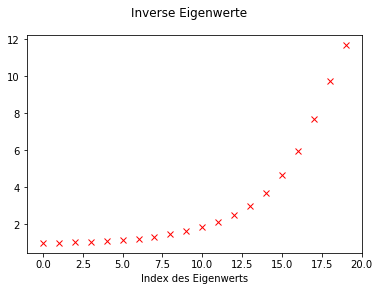

In [11]:
plt.plot(1/lambdaschs_sorted, 'rx')
plt.suptitle('Inverse Eigenwerte')
plt.xlim(-1,20)
plt.xlabel('Index des Eigenwerts')

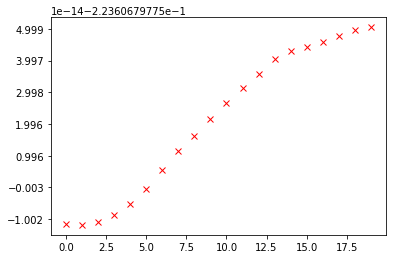

In [31]:
plt.plot(np.array(U[:,0]).reshape(-1), 'rx')

### d) Transformation der Verteilungen

In [13]:
c = np.linalg.inv(U)*g
b = np.linalg.inv(U)*f
c_mess = np.linalg.inv(U)*g_mess

Die aus den Messfehlern propagierte Kovarianzmatrix von b folgt mithilfe der BVB-Formel:
$$  b = D^{-1}c = D^{-1}U^{-1} g_{mess} \\ 
\rightarrow  V(b) = D^{-1}U^{-1} V(g_{mess}) (D^{-1}U^{-1})^T. $$ 


In [14]:
V_g_mess = np.matrix(np.diag(np.array(g_mess).reshape(-1)))
V_b = np.linalg.inv(D)*np.linalg.inv(U)*V_g_mess*(np.linalg.inv(D)*np.linalg.inv(U)).T
V_b

matrix([[ 5.03350000e+02,  1.54494236e+02,  1.04318437e+02,
          7.65264536e+01,  7.36486287e+01,  4.00716202e+01,
          3.59263095e+01,  1.72774691e+01, -3.89503022e+00,
         -5.71843972e-01, -7.68518519e+00,  1.75514045e+01,
          3.52120782e+01, -2.34884322e+00,  6.29185220e+00,
         -1.80523232e+01, -2.46759413e+01,  4.83342422e+00,
         -1.03909768e+02, -2.78343826e+01],
        [ 1.54494236e+02,  4.36172876e+02, -5.88773947e+01,
          1.26636264e+02,  8.37025093e+01,  7.91393644e+01,
          4.17798565e+01,  3.01714266e+01, -1.31229400e+01,
          7.91012796e+00, -1.03572960e+01,  2.75908588e+01,
          1.32929774e+01,  3.37258257e+01,  8.17256254e+00,
         -1.93350085e+01, -1.37580919e+01,  3.55755385e+01,
         -2.09037552e+01, -8.84292628e+01],
        [ 1.04318437e+02, -5.88773947e+01,  4.77088175e+02,
          9.05868824e+01, -1.03958095e+02, -7.15874979e+01,
         -6.23391470e+01, -3.31566420e+01,  3.52752839e+01,
         -2.

##### Entfaltung:$$ b_{\text{unf}} = D^{-1}U^{-1}g_{\text{mess}}. $$

In [15]:
b_unf = np.linalg.inv(D)*np.linalg.inv(U)*g_mess
b_unf

matrix([[-2251.04963295],
        [ -690.91922954],
        [ -466.52623091],
        [ -342.23670464],
        [ -329.3666805 ],
        [ -179.20573364],
        [ -160.66734023],
        [  -77.26719097],
        [   17.4191047 ],
        [    2.55736399],
        [   34.36919299],
        [  -78.49226697],
        [ -157.473201  ],
        [   10.5043462 ],
        [  -28.13801846],
        [   80.73244377],
        [  110.35416432],
        [  -21.61573022],
        [  464.69860952],
        [  124.47914325]])

In [16]:
b_unf_normed = np.array(b_unf).reshape(-1)/np.sqrt(np.diag(V_b))
b_normed = np.array(b).reshape(-1)/np.sqrt(np.diag(V_b))

Ab einem bestimmten $j$ fluktuieren die Koeffizienten $b_j$ zufällig um 0 mit der Standardabweichung 1.  
Diese Werte bieten keinerlei Information und sollten in der Lösung nicht berücksichtigt werden, daher wird regularisiert.  
**Regularisierung = Abschneiden dieser Eigenwerte**  
Die Werte, die im folgenden Plot nicht deutlich über 1 liegen (etwa ab dem achten Wert), sind nicht groß gegenüber ihrer Unsicherheit und verzerren daher das Ergebnis.

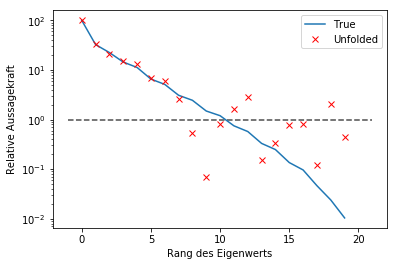

In [17]:
plt.hlines(1,-1,21, linestyle='dashed', alpha=.7)

plt.plot(np.abs(b_normed), label='True')
plt.plot(np.abs(b_unf_normed), 'rx', label='Unfolded')

plt.yscale('log')
plt.ylabel('Relative Aussagekraft')
plt.xlabel('Rang des Eigenwerts')

plt.legend()

### e) Entfaltung mit und ohne Regularisierung

In [18]:
b_unf_reg = np.matrix(  np.concatenate((np.array(b_unf[:7]).reshape(-1), np.zeros(13)))  ).reshape(-1,1)
b_unf_reg

matrix([[-2251.04963295],
        [ -690.91922954],
        [ -466.52623091],
        [ -342.23670464],
        [ -329.3666805 ],
        [ -179.20573364],
        [ -160.66734023],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ],
        [    0.        ]])

In [19]:
f_unf = U*b_unf
f_unf_reg = U*b_unf_reg

In [20]:
V_b_reg = V_b
for i in range(7,20):
    V_b_reg[i,:] = 0
for i in range(7,20):
    V_b_reg[:,i] = 0
#V_b_reg

In [21]:
V_f_reg = U*V_b_reg*U.T
V_f_unf = U*V_b*U.T
sigma_f_reg = np.sqrt(np.diag(V_f_reg))
sigma_f_unf = np.sqrt(np.diag(V_f_unf))

sigma_f_reg

array([16.17448155, 11.72641981, 13.84884219, 18.07469372, 17.32366962,
       15.95334721, 17.34081922, 16.85837288, 14.93702478, 15.41637009,
       15.26890669, 13.13071088, 13.06874324, 13.42921315, 11.37697928,
       11.02456542, 11.95972796,  9.40449262,  8.30753103, 12.16934887])

Die Fehlerrechnung ist so wahrscheinlich **nicht** korrekt...

Text(0.5, 0.98, 'Verteilung von f')

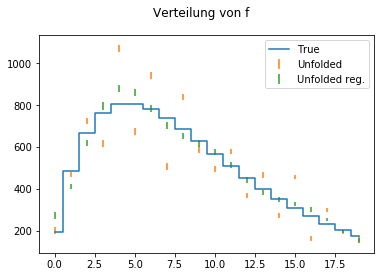

In [22]:
plt.plot(np.array(f).reshape(-1), drawstyle='steps-mid', label='True')
plt.errorbar(x=range(20),y=np.array(f_unf).reshape(-1), yerr=sigma_f_unf, label='Unfolded', fmt=' ') #Die Fehler sind zu klein, kp warum
plt.errorbar(x=range(20),y=np.array(f_unf_reg).reshape(-1), yerr=sigma_f_reg, label='Unfolded reg.', fmt=' ')

plt.legend()
plt.suptitle('Verteilung von f')